<font color='blue'>
    
# ECE449 Machine Learning - Assignment 2

## Task 1: Simple and Small DNN from scratch


[//]: # "Notebook Created by Jinghua Wang (jinghuawang@intl.zju.edu.cn), last modified on 2020-11-03"

</font>

Below is a simple Deep Neural Network(DNN, and more specifically, a multi-layer perceptron, MLP) model with input dimension = 3 and output dimension = 1, this DNN has 1 hidden layer, and the activation function is ReLu:
<img src="img/simple_DNN.png" width="500" height="250">

For simplicity, let's ignore bias in this DNN.

We have: 

$O = k_1 \times a_1 + k_2 \times a_2$

$a_1 = ReLu(h_1)$,
$a_2 = ReLu(h_2)$ 

$h_1 = x_1 \times w_{11}+x_2 \times w_{12}+x_3 \times w_{13}$ 

$h_2 = x_2 \times w_{21}+x_2 \times w_{22}+x_3 \times w_{23}$ 

In vector-matrix form, we have:

$X = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$,
$H = \begin{bmatrix} h_1 \\ h_2 \end{bmatrix}$,
$A = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}$,
$W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{bmatrix}$,
$K = \begin{bmatrix} k_1 & k_2 \end{bmatrix}$ 

$H = W \times X$,
$A = ReLu(H)$,
$O = K \times A$

$O = K \times ReLu(W \times X)$

Suppose the label true value is $Y$ given input $\vec{X} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$, and we use squared loss function $L = \frac{1}{2}(O - y)^2$.

$W$ and $K$ contain all the parameters (8 numbers in total) we need to update in the training process.

Before training starts, we assign some random initial values to our parameters $W$ and $K$.

During training, we obtain $\frac{\partial L}{\partial W}$ and $\frac{\partial L}{\partial K}$, then we use $W_i = W_{i-1} - \frac{\partial L}{\partial W} \times lr$ and $K_i = K_{i-1} - \frac{\partial L}{\partial K} \times lr$ to update $W$ and $K$ in order to make loss L smaller and smaller.

This is the basic idea of gradient decent, which is a popular set of non-convex optimization methods used in machine learning especially in deep learning.

### What are the expressions for the gradients of our 6 parameters in $W$ and 2 parameters in $K$?

Our loss function is: $L = \frac{1}{2}(O-y)^2 = \frac{1}{2}(K \times A - y)^2 = \frac{1}{2}((k_1 \times a_1 + k_2 \times a_2) - y)^2$

$\frac{\partial L}{\partial K} = 
\begin{bmatrix} \frac{\partial L}{\partial k_1} \\ \frac{\partial L}{\partial k_2} \end{bmatrix} = 
\begin{bmatrix} \frac{\partial L}{\partial O} \frac{\partial O}{\partial k_1} \\ \frac{\partial L}{\partial O} \frac{\partial O}{\partial k_2} \end{bmatrix} = 
\begin{bmatrix} (O-y) a_1 \\ (O-y) a_2 \end{bmatrix} = 
\begin{bmatrix}a_1 \\ a_2\end{bmatrix}(O-y) = A(O-y)$

$\frac{\partial L}{\partial W}$ = 
$\begin{bmatrix} 
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\ 
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} 
\end{bmatrix}$ = 
$\begin{bmatrix} 
  \frac{\partial L}{\partial O}\frac{\partial O}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{11}} 
& \frac{\partial L}{\partial O}\frac{\partial O}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{12}} 
& \frac{\partial L}{\partial O}\frac{\partial O}{\partial a_1}\frac{\partial a_1}{\partial h_1}\frac{\partial h_1}{\partial w_{13}} \\ 
  \frac{\partial L}{\partial O}\frac{\partial O}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{21}} 
& \frac{\partial L}{\partial O}\frac{\partial O}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{22}} 
& \frac{\partial L}{\partial O}\frac{\partial O}{\partial a_2}\frac{\partial a_2}{\partial h_2}\frac{\partial h_2}{\partial w_{23}} 
\end{bmatrix}$ =
$\begin{bmatrix} 
  (O-y)k_1\frac{\partial ReLu(h_1)}{\partial h_1}x_1 
& (O-y)k_1\frac{\partial ReLu(h_1)}{\partial h_1}x_2
& (O-y)k_1\frac{\partial ReLu(h_1)}{\partial h_1}x_3 \\ 
  (O-y)k_2\frac{\partial ReLu(h_2)}{\partial h_2}x_1
& (O-y)k_2\frac{\partial ReLu(h_2)}{\partial h_2}x_2
& (O-y)k_2\frac{\partial ReLu(h_2)}{\partial h_2}x_3
\end{bmatrix}$ = 
$(O-y)\begin{bmatrix} 
k_1\frac{\partial ReLu(h_1)}{\partial h_1} \\ 
k_2\frac{\partial ReLu(h_2)}{\partial h_2}
\end{bmatrix} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}$ =
$\begin{bmatrix}
k_1 & 0 \\
0 & k_2 
\end{bmatrix}
\begin{bmatrix} 
\frac{\partial ReLu(h_1)}{\partial h_1} \\ 
\frac{\partial ReLu(h_2)}{\partial h_2}
\end{bmatrix} 
(O-y)
\begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}$

Now, let's use numpy to build the simple DNN we have seen above, and we use gradient decent method to train this DNN to fit a randomly generated dataset for a binary classification problem.

<font color='blue'>
    
### We provide you this file so that you can test and debug your task 1 implementations in your .py file by yourself, you don't need to modify any code in this jupyter notebook, but you are welcome to change implementations in this notebook if you want to play with this example model training process.
    
### You don't need to submit this notebook.
    
</font>

In [20]:
# use automatic reloading for your code from task1-template.py
# remember to rename task1-template.py before you submit it.
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
import time
from matplotlib import pyplot as plt
from task1_template import *

## 1. Generate Random Dataset

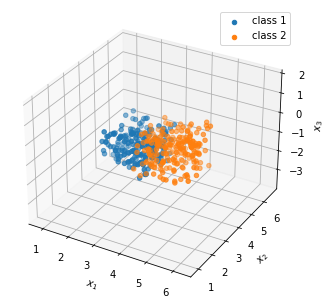

In [5]:
# Generate a random dataset and visualize it.
num_samples = 400
dataset = generate_random_dataset(num_samples)
visualize_dataset(dataset, window_title="Random Generated Dataset")

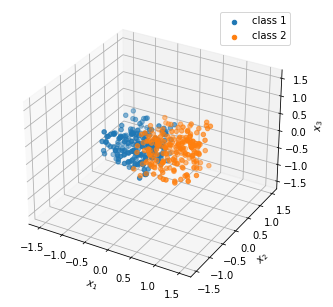

In [6]:
# Normalize the dataset and visualize the normalized dataset.
dataset = normalize_dataset(dataset)
visualize_dataset(dataset, window_title="Normalized Dataset")

## 2. Test Your Implementations

### 2.1 Test Your ReLu

Your relu figure should be the same as the correct figure shown in the right.
D:\Programs\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


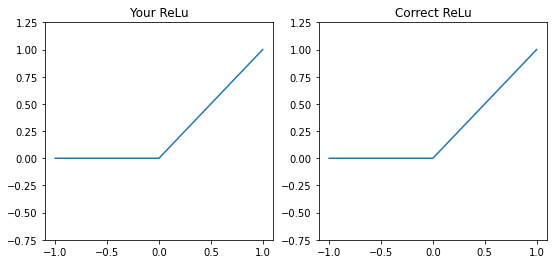

In [7]:
print("Your relu figure should be the same as the correct figure shown in the right.")
# test your relu implementation
relu_test_x = np.array([-1,-0.5,0,0.5,1])
relu_test_y = np.array([0,0,0,0.5,1])
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].set_title("Your ReLu")
ax[0].plot(relu_test_x, relu(relu_test_x))
ax[0].set_ylim([-0.75,1.25])
ax[1].set_title("Correct ReLu")
ax[1].plot(relu_test_x, relu_test_y)
ax[1].set_ylim([-0.75,1.25])
fig.show()

### 2.2 Test Your $\frac{\partial ReLu(x)}{\partial x}$

Your prelu figure should be the same as the correct figure shown in the right.
D:\Programs\miniconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


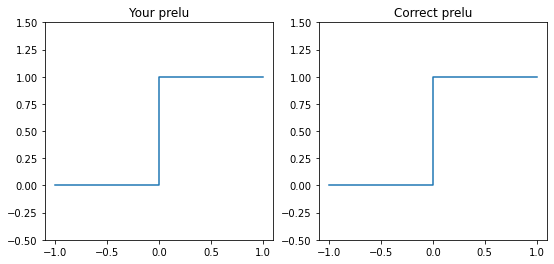

In [8]:
print("Your prelu figure should be the same as the correct figure shown in the right.")
# test your prelu implementation
prelu_test_x = np.array([-1,-0.5,0,0.0000000000001,0.5,1])
prelu_test_y = np.array([0,0,0,1,1,1])
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].set_title("Your prelu")
ax[0].plot(prelu_test_x, prelu(prelu_test_x))
ax[0].set_ylim([-0.5,1.5])
ax[1].set_title("Correct prelu")
ax[1].plot(prelu_test_x, prelu_test_y)
ax[1].set_ylim([-0.5,1.5])
fig.show()

### 2.3 Test Your $\frac{\partial Loss}{\partial W}$ and $\frac{\partial Loss}{\partial K}$

In [26]:
def pLpW_func(W):
    _,_, O = DNNforward(dataset[:,:3], W, K_test)
    return loss(dataset[:,3], O)

def pLpK_func(K):
    _,_, O = DNNforward(dataset[:,:3], W_test, K)
    return loss(dataset[:,3], O)

In [27]:
W_test = np.random.uniform(low=-0.2, high=0.2, size=(2,3))
K_test = np.random.uniform(low=-0.2, high=0.2, size=(2))

In [28]:
pLpW_approx = computeNumericalGradient(pLpW_func, W_test)
pLpK_approx = computeNumericalGradient(pLpK_func, K_test)

H_test,A_test,O_test = DNNforward(dataset[:,:3], W_test, K_test)
pLpW_yours, pLpK_yours = DNNbackward(dataset[:,:3], dataset[:,3], W_test, K_test, H_test, A_test, O_test)

In [29]:
print("The approximated gradient pLpW is:\n", pLpW_approx, '\n')
print("The gradient pLpW calculated by your implementation is:\n", pLpW_yours,'\n')
print("The terms in the two matrices should be almost the same and non-zero (small differences in the last 1-2 digits are accepted).")

The approximated gradient pLpW is:
 [[-0.03799548  0.03742498 -0.03737016]
 [-0.08873958  0.0887635  -0.08815913]] 

The gradient pLpW calculated by your implementation is:
 [[-0.03799548  0.03742497 -0.03737016]
 [-0.08873959  0.0887635  -0.08815914]] 

The terms in the two matrices should be almost the same and non-zero (small differences in the last 1-2 digits are accepted).


In [30]:
print("The approximated gradient pLpK is:\n", pLpK_approx, '\n')
print("The gradient pLpK calculated by your implementation is:\n", pLpK_yours,'\n')
print("The terms in the two vectors should be almost the same and non-zero (small differences in the last 1-2 digits are accepted).")

The approximated gradient pLpK is:
 [ 0.03679858 -0.07301226] 

The gradient pLpK calculated by your implementation is:
 [ 0.03679858 -0.07301226] 

The terms in the two vectors should be almost the same and non-zero (small differences in the last 1-2 digits are accepted).


Congratulations on getting all these structural functions correct! Next let's train your DNN model and see if your train function works correctly.

## 3. Train the DNN Model

In [31]:
# set the initial values of W and K by uniform distribution.
rand_weight_low, rand_weight_high = -0.2, 0.2 

np.random.seed(int(time.time()))
W = np.random.uniform(low=rand_weight_low, high=rand_weight_high, size=(2,3))
K = np.random.uniform(low=rand_weight_low, high=rand_weight_high, size=(2))
print("The initial W is:\n")
print(W)
print("\nThe initial K is:\n")
print(K)

print("Before training, the train accuracy is:", trainAcc(dataset[:,:3], dataset[:,3], W, K))

The initial W is:

[[0.12440228 0.16803124 0.10835704]
 [0.17531227 0.00139849 0.09926311]]

The initial K is:

[-0.02941859 -0.04137539]
Before training, the train accuracy is: 0.8875


In [32]:
W_list, K_list = train(dataset[:,:3], dataset[:,3], W, K, lr=0.005, num_epochs=50, batch_size=20, print_loss=False)
W_trained, K_trained = W_list[-1], K_list[-1]
print("The last trained W is:\n")
print(W_trained)
print("The last trained K is:\n")
print(K_trained)
print("After training, the train accuracy is:", trainAcc(dataset[:,:3], dataset[:,3], W_trained, K_trained))

The last trained W is:

[[ 0.23956428  0.04588299  0.22285734]
 [ 0.50101912 -0.34504522  0.42242766]]
The last trained K is:

[-0.23361627 -0.71399354]
After training, the train accuracy is: 1.0


#### After training, your DNN train accuracy should be almost 100% after training using our default settings. If your train accuracy is below 95% we suggest you check your implementations again, particularly your implementations in the train function.

Congratulations on finishing task 1! Below is an optional task for visualizing the model inference boundary of your DNN during the training process.

## 4. Visualize the Training Process

In [33]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interactive(children=(IntSlider(value=49, description='epoch_idx', max=49), Output()), _dom_classes=('widget-i…

<function task1_template.plotDNNInferenceEpoch(epoch_idx, dataset, W_list, K_list)>

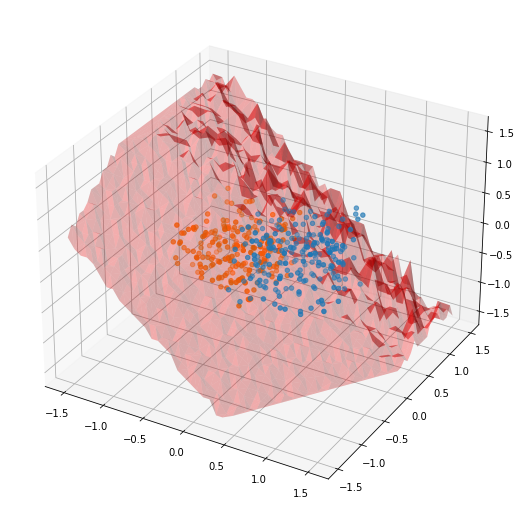

In [34]:
# this code block requires a correct DNNforward implementation in task 1 to work correctly
total_epochs = len(W_list)
interact(plotDNNInferenceEpoch, 
         epoch_idx = widgets.IntSlider(total_epochs-1, 0, total_epochs-1, 1),
         dataset = fixed(dataset),
         W_list = fixed(W_list),
         K_list = fixed(K_list),
)